# Gradiente Descendente e Regressão Linear
#### Dissecando o algoritmo de otimização "Gradiente Descendente" e o algoritmo de aprendizado de máquina "Regressão Linear".

> O algoritmo de **Regressão Linear** tem o objetivo de construir uma reta que melhor explique a relação dos dados.

![regressao-linear](Imagens/regressao-linear-exemplo.png)

- $b_{1}$ = Coeficiente Angular da reta (me diz o quão inclinada a reta está);
- $b$ = Coeficiente Linear (informa o quão deslocada a reta está);
- etapa de treinamento do meu algoritmo é justamente descobrir os valores adequados para minha equação (verificar qual reta se encaixa melhor com os dados);

 ### Força bruta resolve o meu problema? 
 - Utilizar força bruta para verificar a melhor reta que se adeque aos meus dados é uma estratégia não inteligente, pois demanda muito recurso computacional em um período de tempo maior;

### Qual uma abordagem mais sofisticada para problemas de regressão linear?
- ir interando passo a passo os valores de $b_{1}$ e de $b$, sempre verificando se os novos valores estão se adequando perfeitamente aos dados;
- passos mais longos quando o erro é muito grande;
- passos mais lentos quando o erro fica cada vez mais pequeno;

### Como eu posso calcular o meu erro?

- Usando uma função de custo para medir a soma de todos os erros para cada valor (distância dos pontos até a reta);
- $Custo = \sum^{n}_{i=1}(Y_{i}- Y^{hat}_{i})^{2}$
- **n** total de dados analisados; 
- **i** índices para cada um dos pontos;
- Em que **Y** é o valor obtido na minha etapa de treinamento, $Y^{hat}$ seria o valor esperado e a expressão está elevada ao quadrado para evitar saídas negativas (imagine que a minha reta está abaixo dos pontos esperados);

## TORNAR MINHA FUNÇÃO DE CUSTO A MENOR POSSÍVEL!

- Para esse fim, vamos utilizar a ideia de **gradiente descendente**!

- Imagine que começamos com um valor aleatório de $b_{1}$;
- $Y^{hat}$ não varia;
- calculando a derivada de $b_{1}$ inicial para um $b$ fixo, ou o inverso, podemos obter a taxa de variação nesse ponto, de modo a obter a menor taxa de variação possível;

![taxa-de-variacao](Imagens/taxa-de-variacao.png)

- Quanto mais próximo eu estiver do ponto mínimo, teremos um valor para a função de custo menor possível, assim como quando estamos mais distantes, teremos um valor maior para a função de custo implementada;

- Tal problema é facilmente resolvido com derivadas parciais!

- ### $b_{1_{novo}} = b_{1_{velho}} -  a\frac{\partial Custo}{\partial b_{1_{velho}}}$

- ### $b_{novo} = b_{velho} -   b\frac{\partial Custo}{\partial b_{velho}}$

- $a$ e $b$ são as taxas de aprendizado, em que é possível normalizar o tamanho do passo da variação em cada interação;

- ### Seja $Y_{i} = b + b_{1} * x_{i}$
- ### $\frac{\partial Custo}{\partial b_{1_{velho}}} = \sum_{i=1}^{n} 2[(b + b_{1} * x_{i}) - Y^{hat}_{i}] * x_{i}$
- ### $\frac{\partial Custo}{\partial b_{velho}} = \sum_{i=1}^{n} 2[(b + b_{1} * x_{i}) - Y^{hat}_{i}] * 1$

- Quanto mais próximo próximo do ponto mínimo, menor a taxa de varição, e menor será a atualização do meu peso;
- Quanto mais distante do ponto mínimo, maior a taxa de variação, e maior a atualização do meu peso;
- Com esses valores, eu posso ir atualizando minha função de custo sucessivamente, de modo que o meu erro será menor em cada passo, seja a passos curtos ou a passos longos;

### Implementação com Python

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# extraindo os dados
dataframe = pd.read_csv('plano_saude.csv', encoding = 'utf-8', sep = ',')

print(dataframe)

   idade  custo
0     18    871
1     23   1132
2     28   1242
3     33   1356
4     38   1488
5     43   1638
6     48   2130
7     53   2454
8     58   3066
9     63   4090


In [3]:
dataframe.shape

(10, 2)

In [4]:
# separando os dados x e y do meu dataframe
X = dataframe.iloc[:, 0].values
Y = dataframe.iloc[:, 1].values

In [5]:
# visualizando os dados relativos a idade
print(X)
print(X.shape)

[18 23 28 33 38 43 48 53 58 63]
(10,)


In [6]:
# visualizando os dados relativos ao custo
print(Y)
print(Y.shape)

[ 871 1132 1242 1356 1488 1638 2130 2454 3066 4090]
(10,)


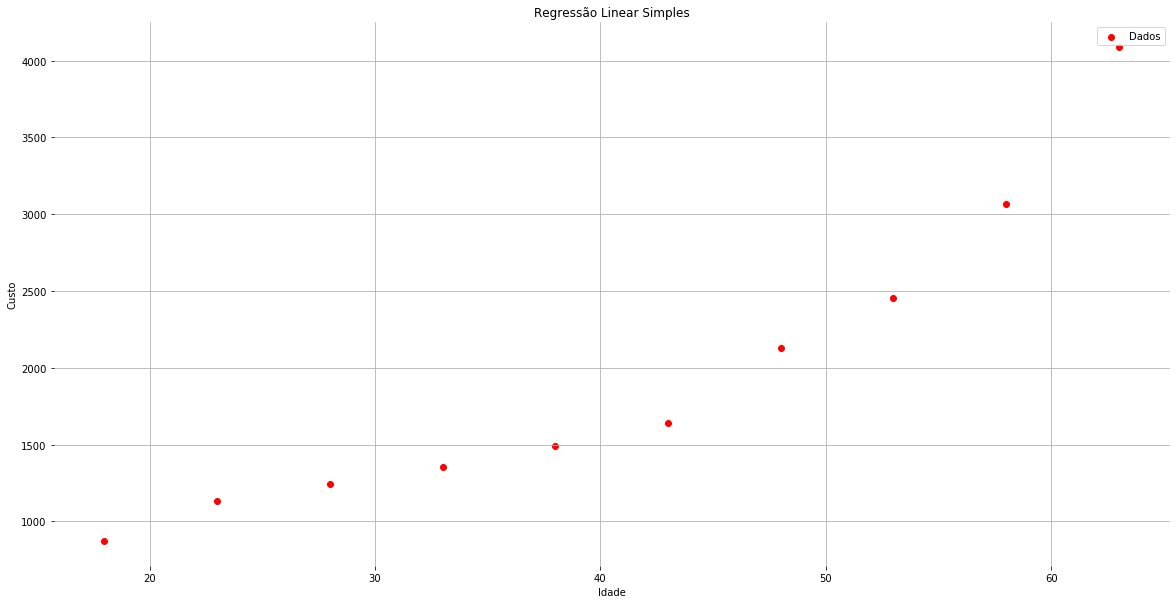

In [7]:
# definindo a dimensão do gráfico
plt.figure(figsize = (20,10))

# plotando os dados x e y no gráfico
plt.scatter(X, Y, color = 'red', label = 'Dados')

# colocando um título no gráfico
plt.title('Regressão Linear Simples')

# colocando um título no eixo x
plt.xlabel('Idade')

# colocando um título no eixo y
plt.ylabel('Custo')

# colocando a legenda no gráfico
plt.legend()

# colocando uma grade ao gráfico
plt.grid(True)

# removendo a moldura do gráfico
plt.box(False)

In [41]:
# definindo uma reta aleatoria
b1, b, alfa = 7, 1, 0.000001

# definindo a quantidade de interações do algoritmo
iteracoes = 10000

# Implementando o gradiente descendente
for i in range(iteracoes):
    Y_previsto = b1 * X + b # valor atual da reta
    derivada_b1 = np.sum(2 * np.dot(X,(Y_previsto - Y))) # derivando a função de custo em relação a b1
    derivada_b = np.sum(2 * (Y_previsto - Y)) # derivando a função de custo em relação a b
    b1 = b1 - derivada_b1 * alfa; # atualizando b1
    b = b - derivada_b * alfa; # atualizando b
    
print("valor de b1: {} e valor de b {}".format(b1, b))

valor de b1: 49.83673948069381 e valor de b -10.451423623547313


In [31]:
# definindo valores arbitrários para o eixo x
valoresX = np.linspace(18, 63)

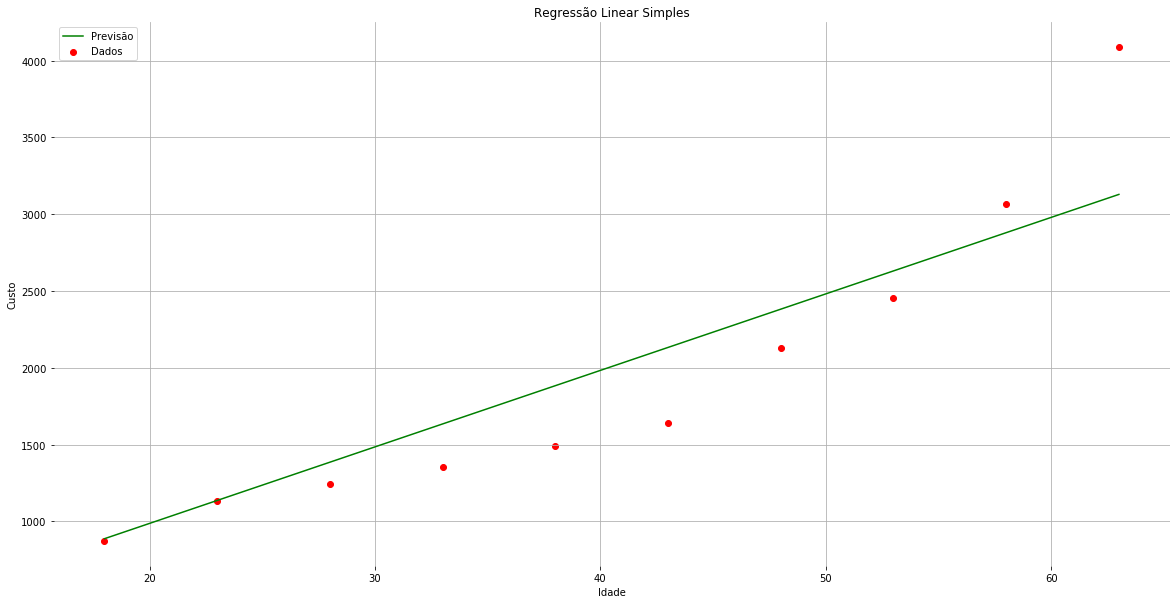

In [42]:
# definindo a dimensão do gráfico
plt.figure(figsize = (20,10))

# plotando os dados x e y no gráfico
plt.scatter(X, Y, color = 'red', label = 'Dados')

plt.plot(valoresX, valoresX * b1 + b, color = "green", label = "Previsão")

# colocando um título no gráfico
plt.title('Regressão Linear Simples')

# colocando um título no eixo x
plt.xlabel('Idade')

# colocando um título no eixo y
plt.ylabel('Custo')

# colocando a legenda no gráfico
plt.legend()

# colocando uma grade ao gráfico
plt.grid(True)

# removendo a moldura do gráfico
plt.box(False)

In [39]:
# realizando uma predição para uma pessoa de 40 anos
print(b1 * 40 + b)

1984.3833222000328


In [43]:
# calculando o erro obtido
valor_obtido = b1 * X + b
valor_real = Y
erro = ((valor_obtido - valor_real) / valor_real)*100
media_erro = np.sum(abs(erro)) / len(Y)
print(100 - media_erro)

86.05078654625225
